In [1]:
import os
import json

data_folder = os.path.join(os.path.expanduser("~"), "Data", "twitter")
friends_filename = os.path.join(data_folder, "python_friends.json")
with open(friends_filename) as inf:
    friends = json.load(inf)

In [2]:
friends = {user: set(friends[user]) for user in friends}

In [3]:
def compute_similarity(friends1, friends2):
    set_friends1 = set(friends1)
    set_friends2 = set(friends2)
    return len(set_friends1 & set_friends2) / len(set_friends1 | set_friends2)

In [4]:
import networkx as nx
def create_graph(friends, threshold=0):
    G = nx.Graph()
    weights = []
    for user1 in friends.keys():
        for user2 in friends.keys():
            if user1 == user2:
                continue
            weight = compute_similarity(friends[user1], friends[user2])
            weights.append(weight)
            if weight >= threshold:
                G.add_node(user1)
                G.add_node(user2)
                G.add_edge(user1, user2, weight=weight)
    return G

G = create_graph(friends, 0)

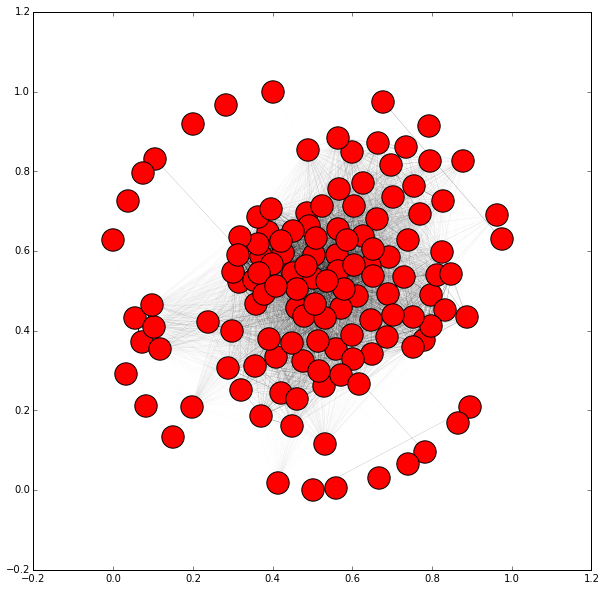

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=500)

edgewidth = [ d['weight'] for (u,v,d) in G.edges(data=True)]
nx.draw_networkx_edges(G, pos, width=edgewidth)

In [6]:
G = create_graph(friends, 0.1)
sub_graphs = nx.connected_component_subgraphs(G)

for i, sub_graph in enumerate(sub_graphs):
    n_nodes = len(sub_graph.nodes())
    print("Subgraph {0} has {1} nodes".format(i, n_nodes))

Subgraph 0 has 11 nodes
Subgraph 1 has 62 nodes
Subgraph 2 has 3 nodes
Subgraph 3 has 2 nodes
Subgraph 4 has 2 nodes
Subgraph 5 has 3 nodes
Subgraph 6 has 5 nodes
Subgraph 7 has 2 nodes


In [7]:
G = create_graph(friends, 0.15)
sub_graphs = nx.connected_component_subgraphs(G)

for i, sub_graph in enumerate(sub_graphs):
    n_nodes = len(sub_graph.nodes())
    print("Subgraph {0} has {1} nodes".format(i, n_nodes))

Subgraph 0 has 9 nodes
Subgraph 1 has 19 nodes
Subgraph 2 has 4 nodes
Subgraph 3 has 2 nodes
Subgraph 4 has 2 nodes
Subgraph 5 has 5 nodes
Subgraph 6 has 2 nodes
Subgraph 7 has 2 nodes
Subgraph 8 has 3 nodes
Subgraph 9 has 3 nodes
Subgraph 10 has 2 nodes
Subgraph 11 has 5 nodes


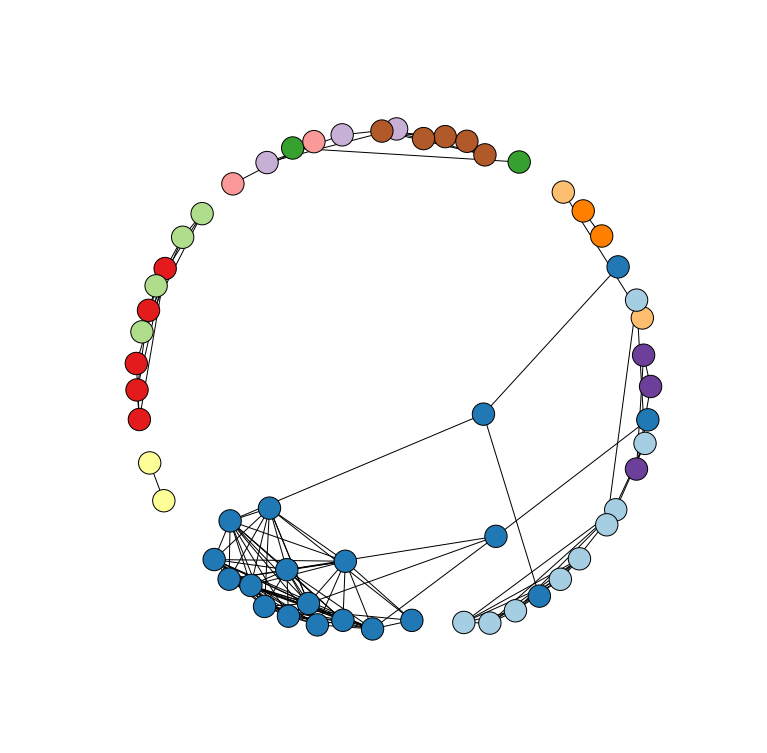

In [8]:
sub_graphs = nx.connected_component_subgraphs(G)
label_dict = {}
for i, sub_graph in enumerate(sub_graphs):
    for node in sub_graph.nodes():
        label_dict[node] = i
labels = [label_dict[node] for node in G.nodes()]

plt.figure(figsize=(10,10))
nx.draw(G,node_color=labels,cmap=plt.cm.Paired, node_size=500)

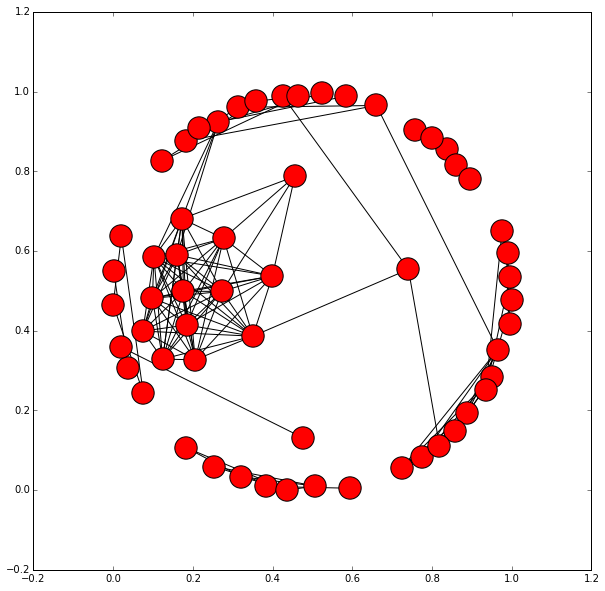

In [9]:
sub_graphs = nx.connected_component_subgraphs(G)
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G)
for i, sub_graph in enumerate(sub_graphs):
    nodes = sub_graph.nodes()
    edges = sub_graph.edges()
    nx.draw_networkx_nodes(G, pos, nodes,node_size=500)
    nx.draw_networkx_edges(G, pos, edges)
    

/Users/bob/anaconda/lib/python3.4/site-packages/matplotlib/axes/_subplots.py:69: MatplotlibDeprecationWarning: The use of 0 (which ends up being the _last_ sub-plot) is deprecated in 1.4 and will raise an error in 1.5
  mplDeprecation)


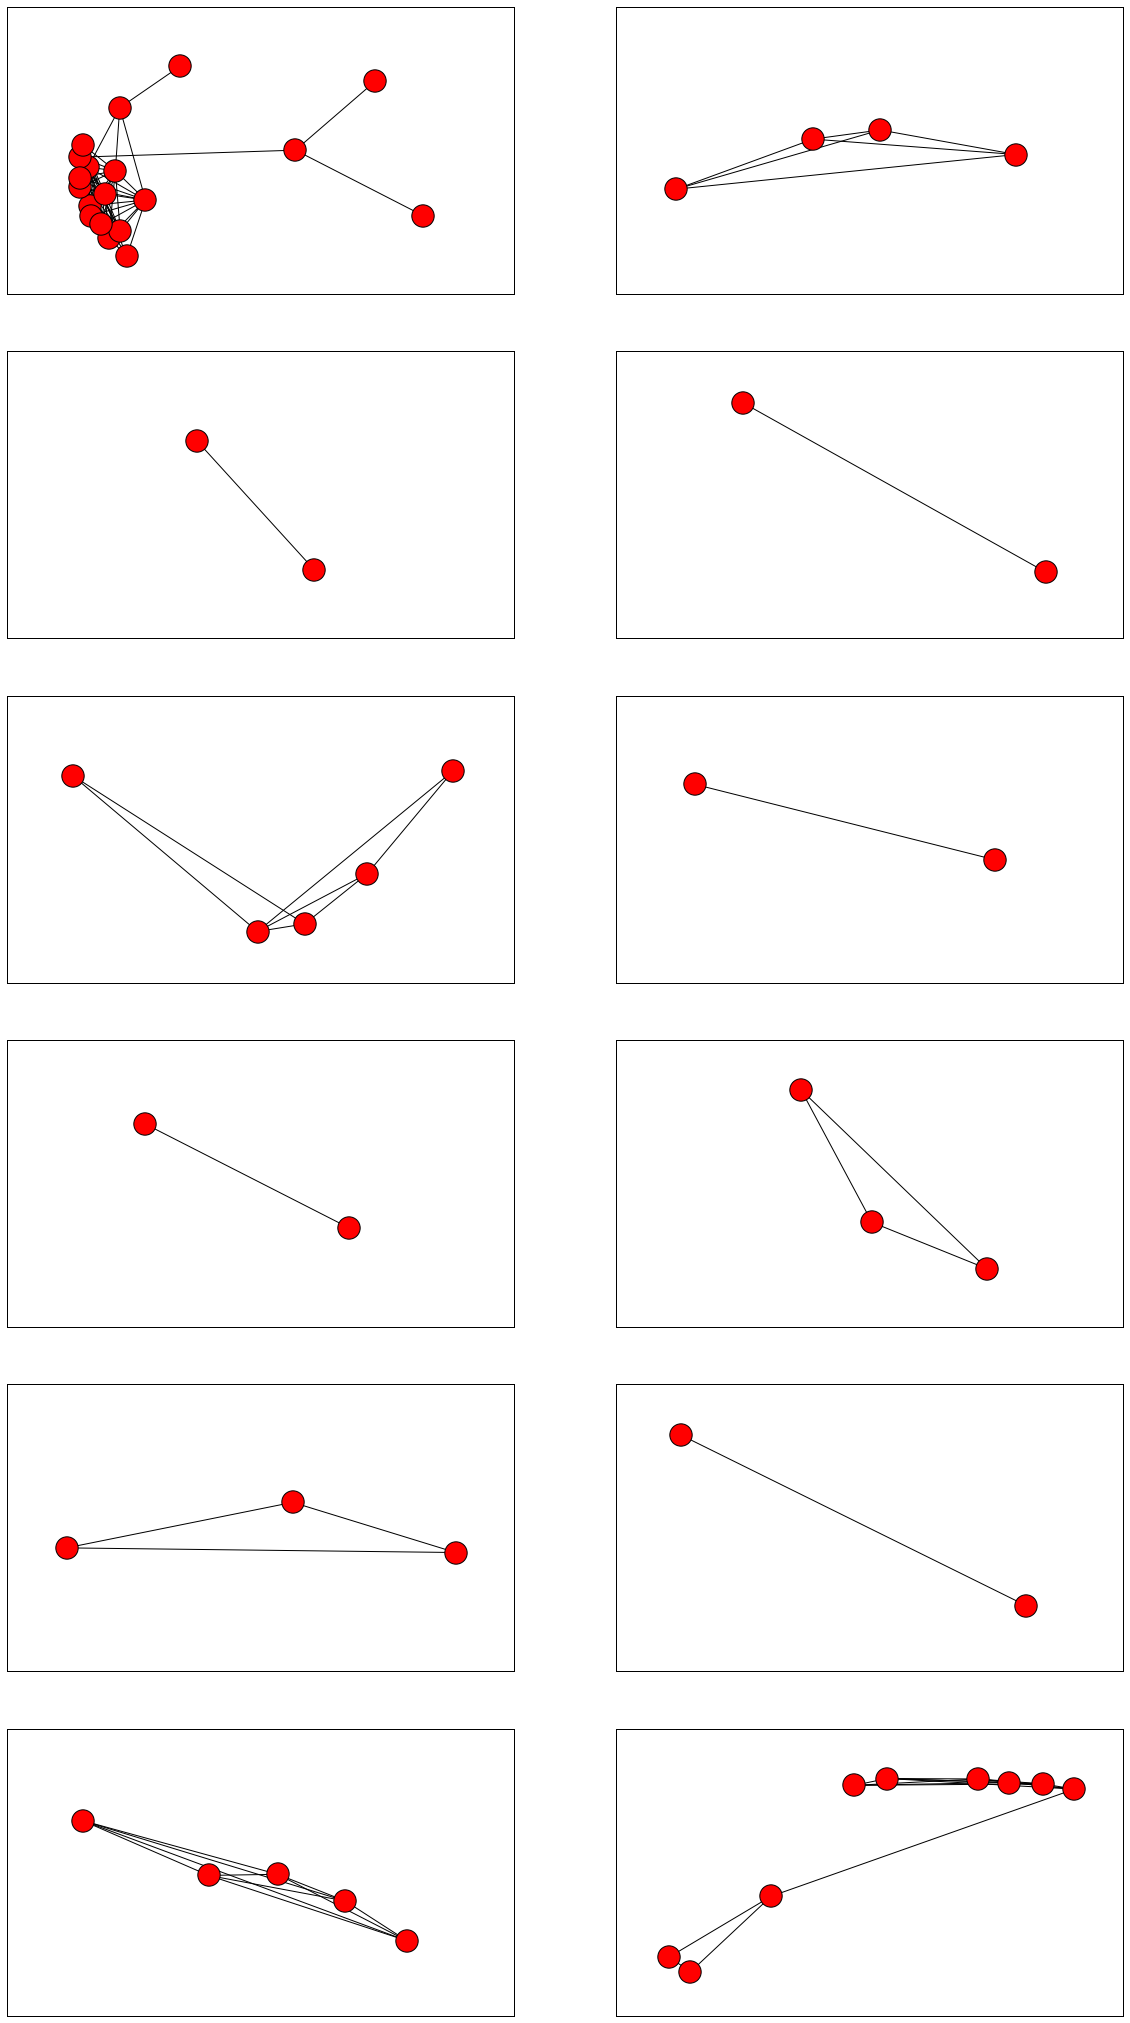

In [10]:
sub_graphs = nx.connected_component_subgraphs(G)
n_subgraphs = nx.number_connected_components(G)

fig = plt.figure(figsize=(20, (n_subgraphs * 3)))
for i, sub_graph in enumerate(sub_graphs):
    ax = fig.add_subplot(int(n_subgraphs / 2), 2, i)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, sub_graph.nodes(), ax=ax, node_size=500)
    nx.draw_networkx_edges(G, pos, sub_graph.edges(), ax=ax)


In [25]:
#from sklearn.metrics import silhouette_score
import numpy as np

def compute_silhouette(threshold, friends):
    G = create_graph(friends, threshold=threshold)
    if len(G.nodes()) == 0:
        return -99  # Invalid graph
    sub_graphs = nx.connected_component_subgraphs(G)
    if not (2 <= nx.number_connected_components(G) < len(G.nodes()) - 1):
        return -99  # Invalid number of components, Silhouette not defined
    label_dict = {}
    for i, sub_graph in enumerate(sub_graphs):
        for node in sub_graph.nodes():
            label_dict[node] = i
    labels = np.array([label_dict[node] for node in G.nodes()])
    X = nx.to_scipy_sparse_matrix(G).todense()
    X = 1 - X
    return silhouette_score(X, labels, metric='precomputed')


print(compute_silhouette(0.1, friends))


(90,)
(90, 90)
0.0994250608578


In [28]:
from scipy.optimize import minimize #(fun, x0, args=(),

def invert(func):
    def inverted_function(*args, **kwds):
        return -func(*args, **kwds)
    return inverted_function

result = minimize(invert(compute_silhouette), 0.1, method='nelder-mead', args=(friends,), options={'maxiter':10, })
print(result)

(90,)
(90, 90)
(85,)
(85, 85)
(84,)
(84, 84)
(84,)
(84, 84)
(77,)
(77, 77)
(65,)
(65, 65)
  status: 2
 success: False
 message: 'Maximum number of iterations has been exceeded.'
    nfev: 6
       x: array([ 0.135])
     fun: -0.19204945304474358
     nit: 3


In [29]:
G = create_graph(friends, threshold=0.135)
sub_graphs = nx.connected_component_subgraphs(G)

for i, sub_graph in enumerate(sub_graphs):
    n_nodes = len(sub_graph.nodes())
    print("Subgraph {0} has {1} nodes".format(i, n_nodes))

Subgraph 0 has 10 nodes
Subgraph 1 has 28 nodes
Subgraph 2 has 2 nodes
Subgraph 3 has 2 nodes
Subgraph 4 has 7 nodes
Subgraph 5 has 2 nodes
Subgraph 6 has 2 nodes
Subgraph 7 has 3 nodes
Subgraph 8 has 5 nodes
Subgraph 9 has 2 nodes
Subgraph 10 has 2 nodes


In [124]:
labels

array([0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1, 3, 0, 1, 1, 1, 1,
       1, 1, 4, 1, 1, 5, 0, 1, 1, 1, 1, 6, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 6, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 3, 0, 1, 5, 1, 1, 1,
       1, 1, 1, 4, 5, 2, 1, 0, 1, 1, 4, 7, 0, 1, 1, 0, 1, 1, 2, 1, 0])

In [125]:
X = 1-nx.to_scipy_sparse_matrix(G).todense()

In [20]:
def silhouette_score(X, labels, metric='precomputed'):
    labels = np.array(labels)
    print(labels.shape)
    return np.mean(silhouette_samples(X, labels, metric=metric))

def silhouette_samples(X, labels, metric='precomputed'):
    print(X.shape)
    distances = X  #pairwise_distances(X, metric=metric, **kwds)
    n = labels.shape[0]
    A = np.array([_intra_cluster_distance(distances[i], labels, i)
                  for i in range(n)])
    B = np.array([_nearest_cluster_distance(distances[i], labels, i)
                  for i in range(n)])
    sil_samples = (B - A) / np.maximum(A, B)
    # nan values are for clusters of size 1, and should be 0
    return np.nan_to_num(sil_samples)

def _intra_cluster_distance(distances_row, labels, i):
    """Calculate the mean intra-cluster distance for sample i.

    Parameters
    ----------
    distances_row : array, shape = [n_samples]
        Pairwise distance matrix between sample i and each sample.

    labels : array, shape = [n_samples]
        label values for each sample

    i : int
        Sample index being calculated. It is excluded from calculation and
        used to determine the current label

    Returns
    -------
    a : float
        Mean intra-cluster distance for sample i
    """
    mask = (labels == labels[i])
    mask[i] = False
    mask = mask.reshape(distances_row.shape)
    #print("Cluster {}".format(i))
    #print(mask)
    #print(distances_row.flatten())
    #print(distances_row.flatten()[mask])
    a = np.mean(distances_row[mask])
    return a


def _nearest_cluster_distance(distances_row, labels, i):
    """Calculate the mean nearest-cluster distance for sample i.

    Parameters
    ----------
    distances_row : array, shape = [n_samples]
        Pairwise distance matrix between sample i and each sample.

    labels : array, shape = [n_samples]
        label values for each sample

    i : int
        Sample index being calculated. It is used to determine the current
        label.

    Returns
    -------
    b : float
        Mean nearest-cluster distance for sample i
    """
    label = labels[i]
    b = np.min([np.mean(distances_row[(labels == cur_label).reshape(distances_row.shape)])
               for cur_label in set(labels) if not cur_label == label])
    return b

In [127]:
silhouette_score(X, labels, metric='precomputed')

(90,)
(90, 90)


0.099425060857770378